# CNN : Convolutional Neural Networks


## padding : input + (zero)padding 
https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html<br>
(kernel size: 3, padding size: 1) -> 사이즈가 유지된다. (kernel := filter)<br>
H' = H + 2P - F + 1<br>
W' = W + 2P - F + 1<br>

## Channel && Kernel(Filter)
kernel == filter == neuron<br>
input channel == kernel channel <br>
<br>
(-, -, channel) == (-, -, channel)<br>
(6, 6, 3) == (3, 3, 3)<br>
<br>
kernel 의 각 원소가 weight<br>
DL 으로 weight를 구한다.<br>
output channel == kernel's count<br>
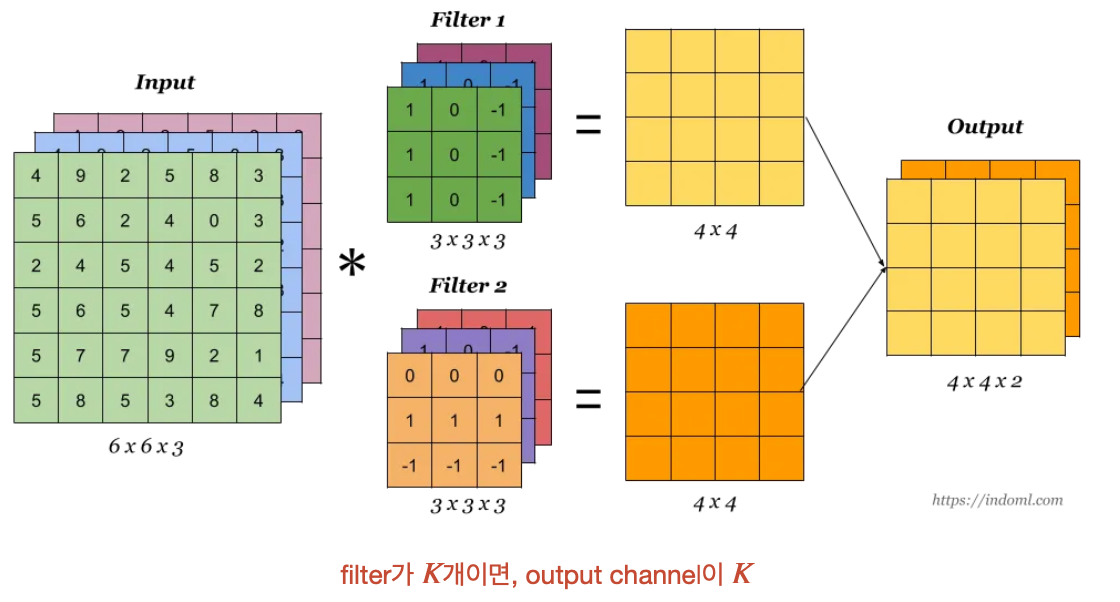

## Pooling Layers : 연산량 감소
kernel size == stride(:= step) size<br>
stride 는 다음 window를 설정할 때, 몇 칸을 뛸지 결정하는 값<br>
### Stride
Floor Function(바닥함수: 내림) : $\lfloor \rfloor$<br>
S = Stride<br>
H' = $\lfloor (H + 2P - F)/S +1\rfloor$<br>
W' = $\lfloor (W + 2P - F)/S +1\rfloor$<br>
<br>

### Max Pooling
### Avg Pooling

특이사항 MNIST : conv3 && fc1 모두 사용가능.
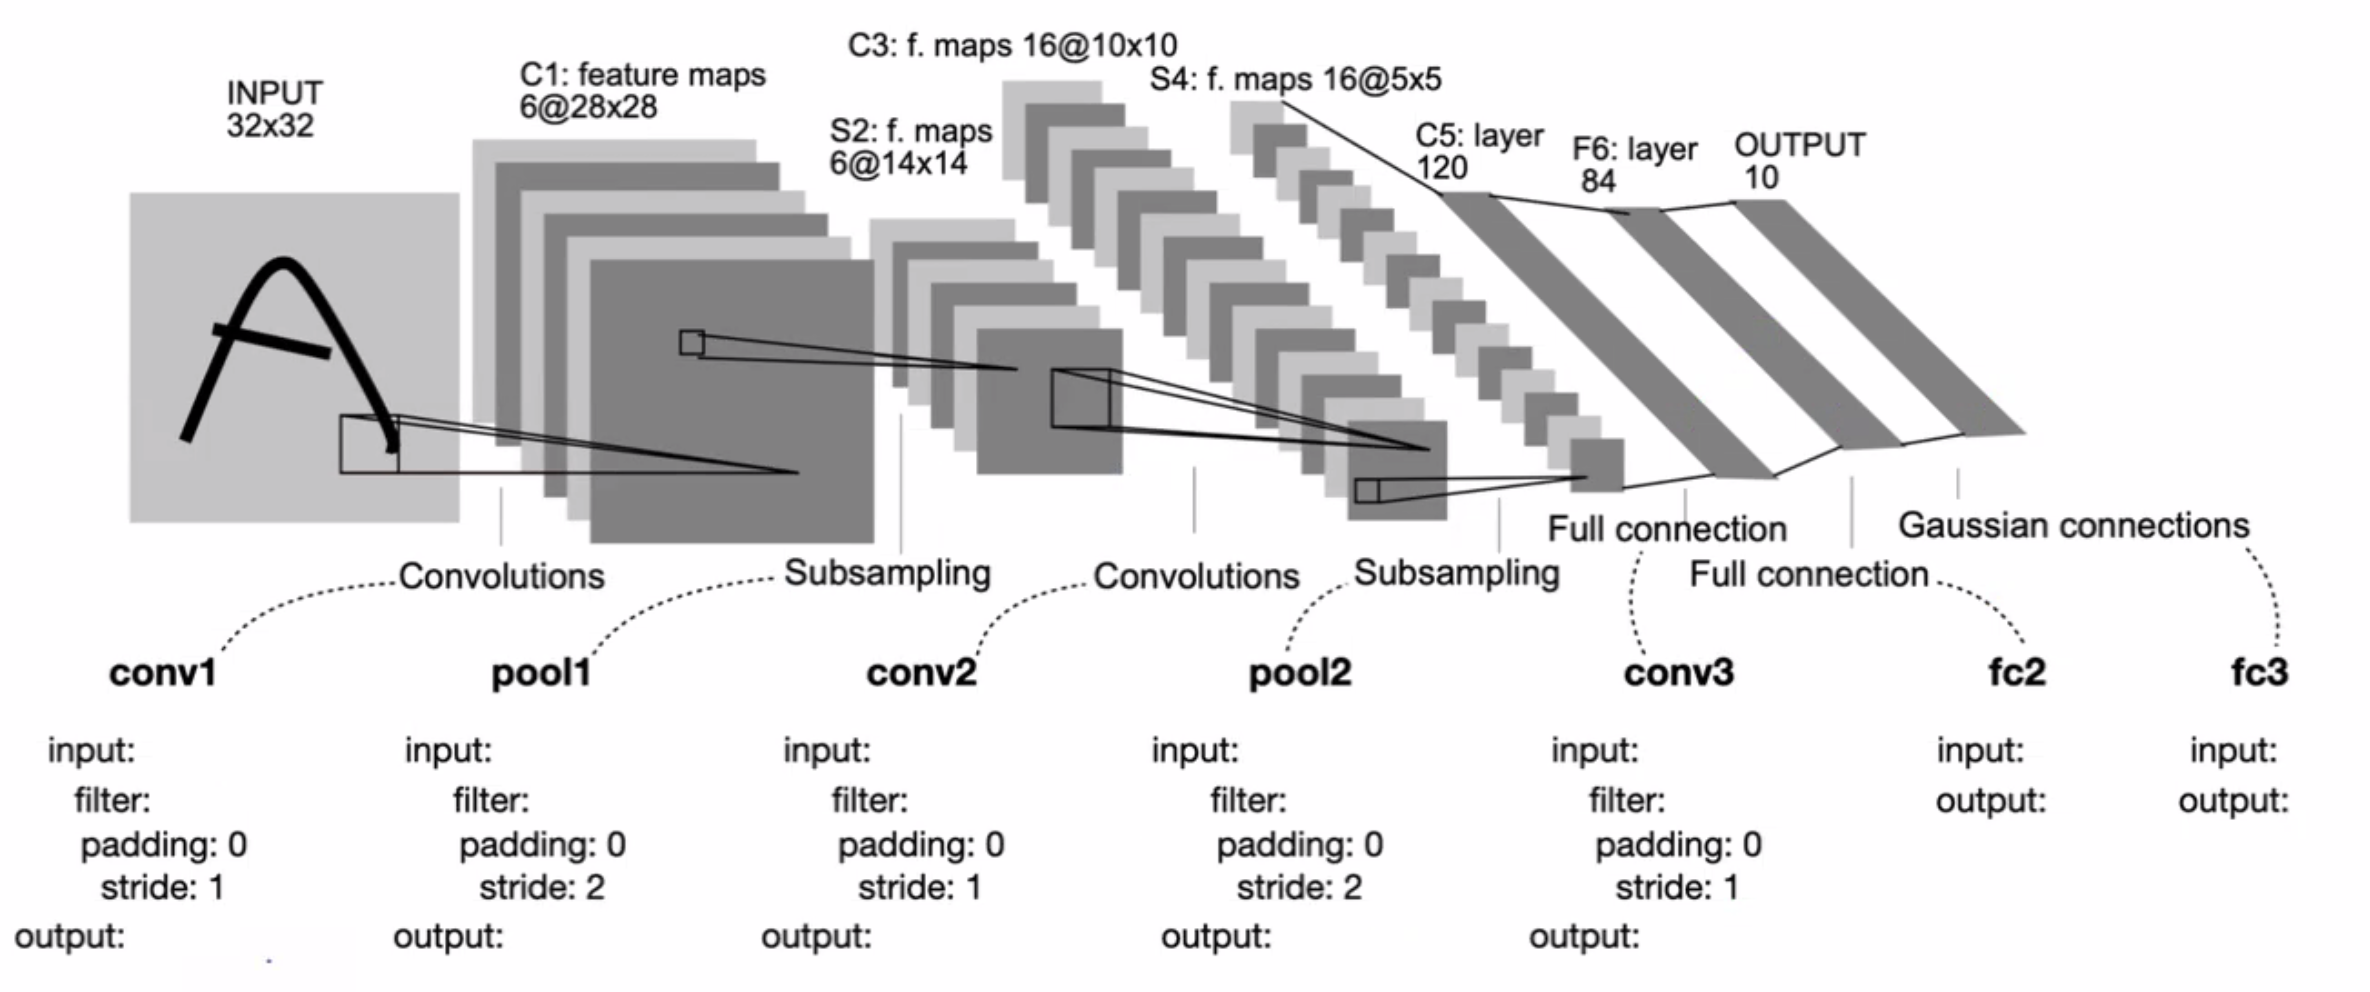

|/|conv1|pool1|conv2|pool2|conv3|fc2|fc3|
|---|---|---|---|---|---|---|---|
|input|32x32|6@28x28|6@14x14|16@10x10|16@5x5|120|84|
|filter|5x5 6EA|6@2x2 6EA|6@5x5 16EA|16@2x2 16EA|16@5x5 120EA|-|-|
|padding|0|0|0|0|0|-|-|
|stride|1|2|1|2|1|-|-|
|output|6@28x28|6@14x14|16@10x10|16@5x5|120@1x1|84|10|

In [3]:
import torch
import torch.nn as nn

H, W = 100, 150
input_tensor = torch.randn(size=(1, H, W))
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
output_tensor = conv(input_tensor)
print(input_tensor.shape)
print(output_tensor.shape)

torch.Size([1, 100, 150])
torch.Size([1, 98, 148])


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

Input: $(N, C_{in}, H_{in}, W_{in})$ or $(C_{in}, H_{in}, W_{in})$

Output: $(N, C_{out}, H_{out}, W_{out})$ or $(C_{out}, H_{out}, W_{out})$


$$H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]\times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]\times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$

In [9]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)
print(input.shape)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 26, 100])
